Monte Carlo simulation can be used to find the value of a definite integral that does not have a closed-form analytical solution. "Closed-form" refers to the ability to express the solution in terms of constants, variables, and operations. For example, the integral of (x^2 + 4x) has the closed-form solution (2x + 4). 

Not all integrals will have a closed-form solution. One of the "simplest" examples is the integral of exp(x^2):

$\int e^{x^{2}}$

We can use a method called the "rejection method" to determine the result of a definite integral, even if the integral does not have a closed-form solution. The rejection method works like the archery example from the previous blog post- we will score a "hit" if the value is below the integral, and a "miss" if the value is above the integral.

The rejection method uses the following steps over each iteration:

1. Choose x using a uniform distribution between a and b (the limits of the integral)
2. Choose f' using a uniform distribution between 0 and f_max, where f_max is the highest possible value the function can take over the limits of the integral
3. If f' < f(x), score f_max(b-a), otherwise score 0

Let's try this method out for the integral of exp(x^2), between the limits of 0 and 2:

$\int_{0}^{2} e^{x^{2}}$

F_max is exp(2^2), or approximately 54.6. *(What happens if you choose the wrong F_max? If your F_max is too low, your results will be biased, because there will be part of the integral result that can never be chosen. If your F_max is too high, the answer will converge more slowly).*

In [1]:
import random
from numba import jit
import numpy as np

# Monte Carlo simulation function. This is defined as
# a function so the numba library can be used to speed
# up execution. Otherwise, this would run much slower.
@jit
def MCHist(n_hist, a, b, fmax):
    score = (b - a)*fmax
    tot_score = 0
    for n in range(1, n_hist):
        x = random.uniform(a, b)
        f = random.uniform(0, fmax)
        f_x = np.exp(x**2)
        # Check if the point falls inside the integral      
        if f < f_x:
            tot_score += score
    return tot_score

# Run the simulation
num_hist = 1e8
results = MCHist(num_hist, 0.0, 2.0, 54.6) 
integral_val = round(results / num_hist, 6)
print("The calculated integral is {}".format(integral_val))

The calculated integral is 16.449734


Checking this answer with Wolfram Alpha, we get approximately the same result:

[Image in Blog Post]

Let's try this on another, more complicated integral:

$\int_{1}^{4} \frac{e^{x}}{x} + e^{1/x}$

In this case, it's harder to determine a proper f_max. The most straightforward way is to plot the function over the limits of the integral:

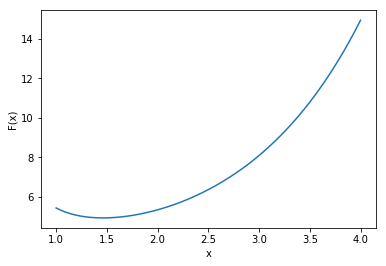

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(1,4,1000)
y = (np.exp(x)/x) + np.exp(1/x)
plt.plot(x,y)
plt.ylabel('F(x)')
plt.xlabel('x');

From the above figure, we can see that the maximum is about 15. But what if we decided not to plot the function? Consider a situation where it's computationally expensive to plot the function over the entire limits of the integral. It's okay for us to choose an f_max that is too large, as long as we are *sure* that all possible values of F(x) will fall below it. The only downside of this approach is that more histories are required to converge to the correct answer. 

Let's choose f_max as 100 to see what happens:

In [3]:
@jit
def MCHist2(n_hist, a, b, fmax):
    score = (b - a)*fmax
    tot_score = 0
    for n in range(1, n_hist):
        x = random.uniform(a, b)
        f = random.uniform(0, fmax)
        f_x = (np.exp(x)/x) + np.exp(1/x)
        # Check if the point falls inside the integral      
        if f < f_x:
            tot_score += score
    return tot_score

# Run the simulation
num_hist2 = 1e8
results2 = MCHist2(num_hist2, 1.0, 4.0, 100) 
integral_val2 = round(results2 / num_hist2, 6)
print("The calculated integral is {}".format(integral_val2))

The calculated integral is 22.587207


Again, we check our work with Wolfram Alpha, and we get approximately the same result:

[Image in Blog Post]

Would we have less variance if we used the same number of histories, but an f_max closer to the true value (15)?

In [4]:
num_hist3 = 1e8
results3 = MCHist2(num_hist2, 1.0, 4.0, 15) 
integral_val3 = round(results3 / num_hist3, 6)
print("The calculated integral is {}".format(integral_val3))

The calculated integral is 22.589891


Choosing f_max correctly does affect how quickly the answer will converge, and generally it's advisable to put in the work to find an appropriate f_max, as it will save you significant time in your simulation.